# DATA DESC

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no) الذبحة الصدرية الناتجه عن الرياضه

ca: number of major vessels (0-3) عدد الاوعيه الرئيسيه

cp : Chest Pain type نوع ألم الصدر

    Value 1: typical angina الذبحة الصدرية النموذجية
    Value 2: atypical angina الذبحة الصدرية اللانمطية
    Value 3: non-anginal pain ألم غير زاوي
    Value 4: asymptomatic بدون أعراض ظاهرة
trtbps : resting blood pressure (in mm Hg) ضغط الدم أثناء الراحة

chol : cholestoral in mg/dl fetched via BMI sensor الكوليسترول

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) سكر الدم

rest_ecg : resting electrocardiographic results نتائج تخطيط القلب في حالة الراحة

    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    وجود شذوذ في موجة ST-T (انقلاب الموجة T و / أو ارتفاع ST أو انخفاض> 0.05 مللي فولت)

    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria إظهار تضخم البطين الأيسر المحتمل أو المؤكد حسب معايير إستس

thalach : maximum heart rate achieved تحقيق أقصى معدل لضربات القلب

target : 0= less chance of heart attack 1= more chance of heart attack

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
import warnings
warnings.simplefilter('ignore')

In [2]:
DATA_PATH = '../data/clean_data.pkl'

In [3]:
df = pd.read_pickle(DATA_PATH)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       302 non-null    int64   
 1   sex       302 non-null    category
 2   cp        302 non-null    category
 3   trtbps    302 non-null    int64   
 4   chol      302 non-null    int64   
 5   fbs       302 non-null    category
 6   restecg   302 non-null    category
 7   thalachh  302 non-null    int64   
 8   exng      302 non-null    category
 9   oldpeak   302 non-null    float64 
 10  slp       302 non-null    category
 11  caa       302 non-null    category
 12  thall     302 non-null    category
 13  output    302 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.9 KB


In [5]:
df.describe()

,age,trtbps,chol,thalachh,oldpeak,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.543046
std,9.04797,17.563394,51.753489,22.903527,1.161452,0.498970
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,1.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,1.000000


In [6]:
Columns_Name = df.columns
print('Columns Name : ')
Columns_Name

Columns Name : 


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
continous_columns =[]
for i  in df.columns:
    if df[i].dtypes != 'category':
        continous_columns.append(i)
continous_columns

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       302 non-null    int64   
 1   sex       302 non-null    category
 2   cp        302 non-null    category
 3   trtbps    302 non-null    int64   
 4   chol      302 non-null    int64   
 5   fbs       302 non-null    category
 6   restecg   302 non-null    category
 7   thalachh  302 non-null    int64   
 8   exng      302 non-null    category
 9   oldpeak   302 non-null    float64 
 10  slp       302 non-null    category
 11  caa       302 non-null    category
 12  thall     302 non-null    category
 13  output    302 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.9 KB


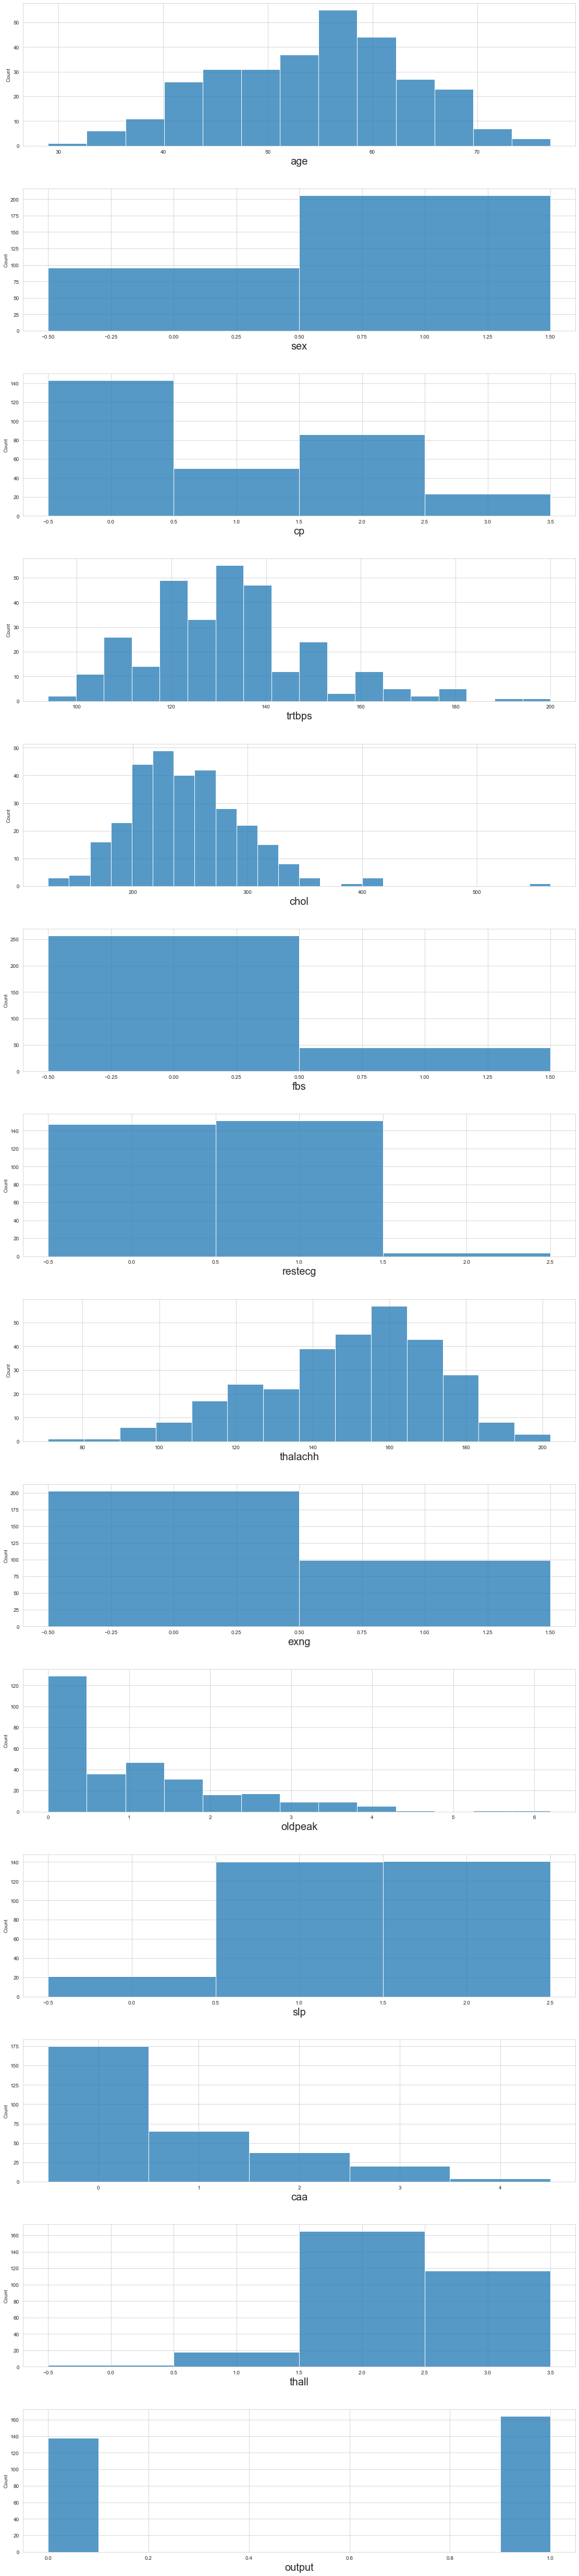

In [9]:
fig,ax = plt.subplots( nrows=14,ncols=1, figsize=(19,90) )

for i in range(14):
    x = sns.histplot(df[Columns_Name[i]],ax=ax[i])
    # add x label and edit font size
    x.set_xlabel(Columns_Name[i],fontsize=20)

# adjust spaces between subplots
plt.subplots_adjust(hspace = 0.3)

# save plot in png file
plt.savefig('../images/hist.png')

plt.show()

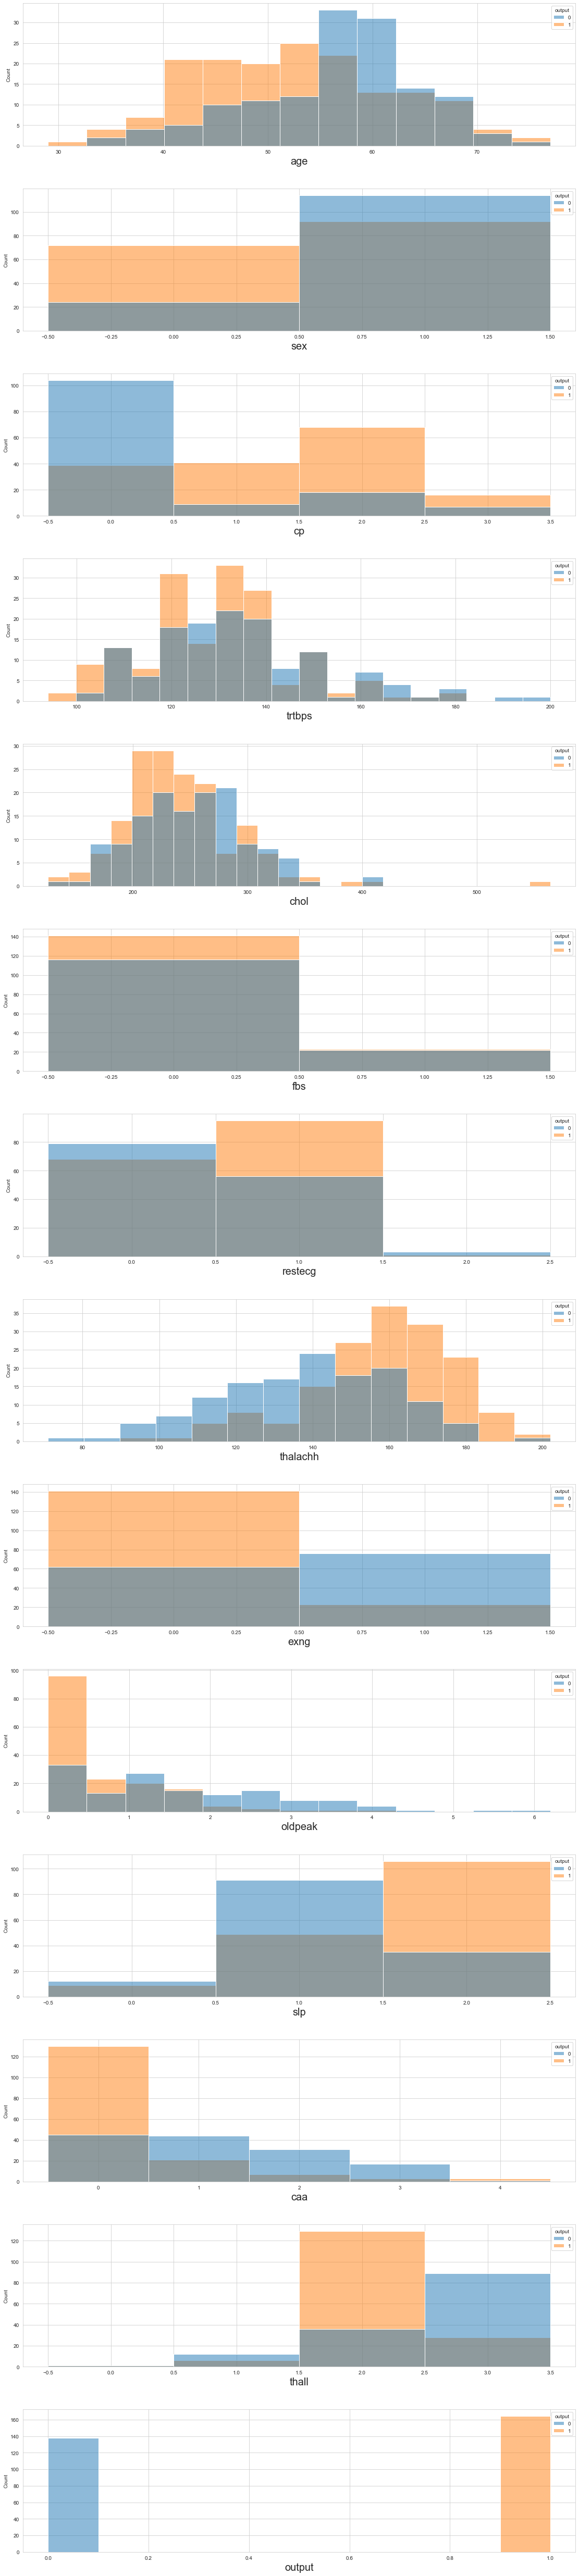

In [10]:
fig,ax = plt.subplots( nrows=14,ncols=1, figsize=(19,90) )

for i in range(14):
    x = sns.histplot(data=df,x=Columns_Name[i],hue='output',ax=ax[i])
    # add x label and edit font size
    x.set_xlabel(Columns_Name[i],fontsize=20)

# adjust spaces between subplots
plt.subplots_adjust(hspace = 0.3)

# save plot in png file
plt.savefig('../images/hist.png')

plt.show()

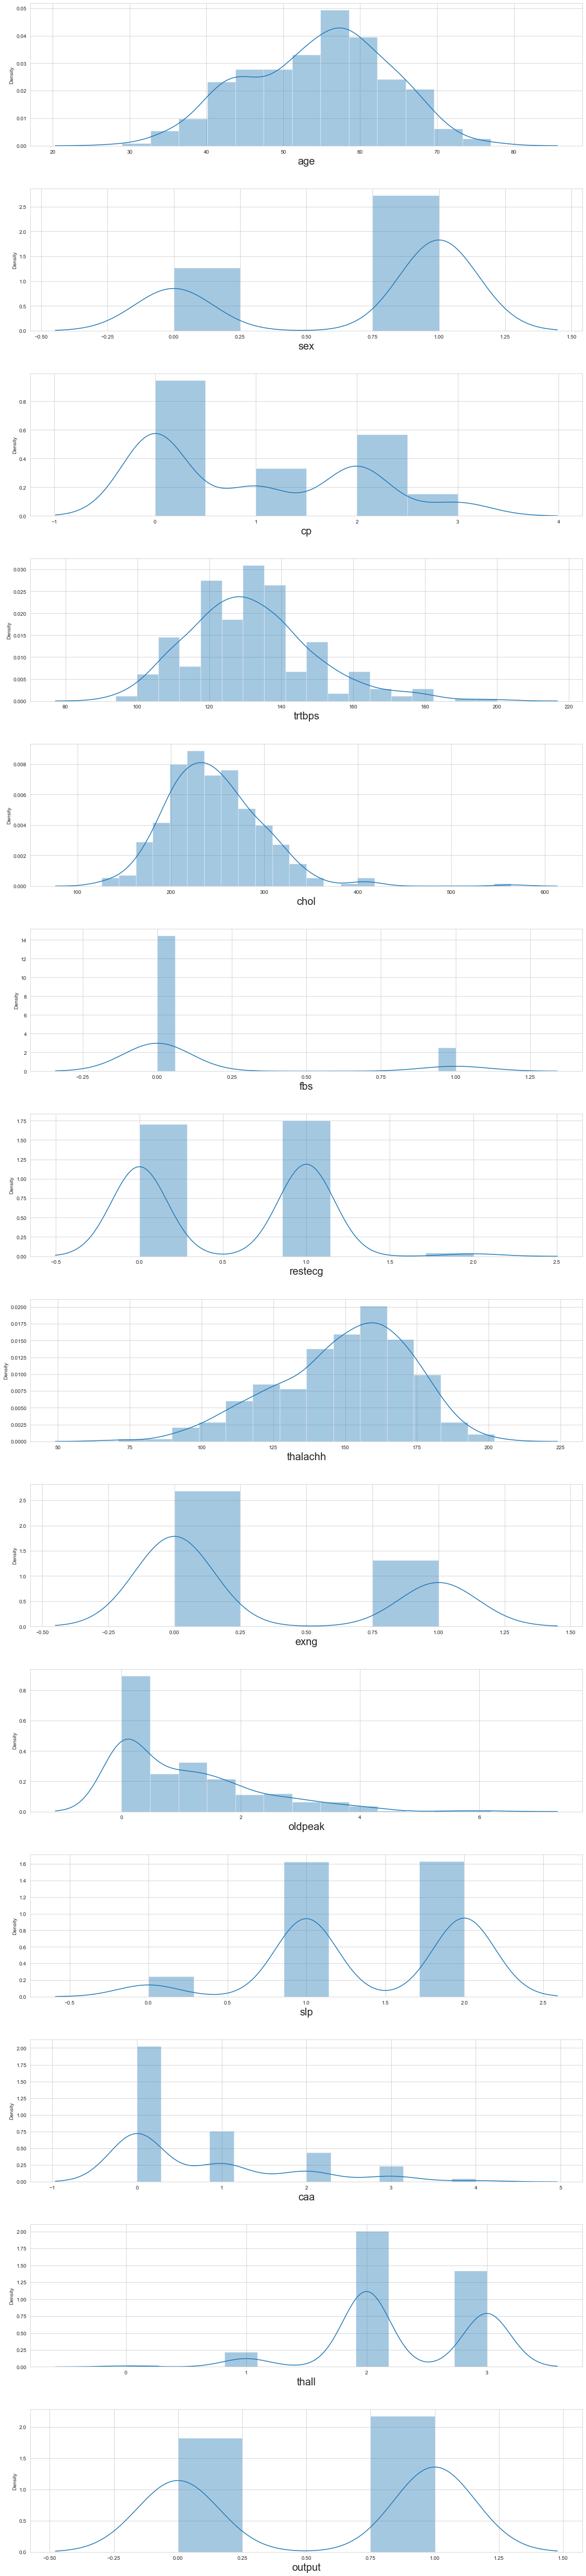

In [11]:
fig, ax = plt.subplots(nrows=14, ncols=1,
                       figsize=(19, 90)
                       )
# fig.tight_layout()
for i in range(14):
    x = sns.distplot(df[Columns_Name[i]], ax=ax[i])
    # add x label and edit font size
    x.set_xlabel(Columns_Name[i], fontsize=20)
# adjust spaces between subplots
plt.subplots_adjust(hspace=0.3)
# save plot in png file
plt.savefig('../images/dist.png')
plt.show()

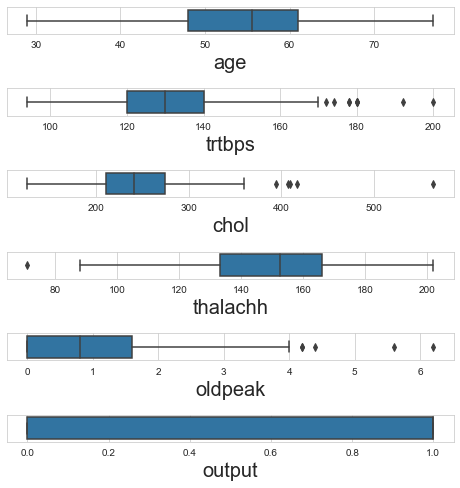

In [12]:
fig, ax = plt.subplots(nrows=len(continous_columns), ncols=1, figsize=(8, 8) )

for i in range(len(continous_columns)):
    x = sns.boxplot(df[continous_columns[i]], ax=ax[i])
    # add x label and edit font size
    x.set_xlabel(continous_columns[i], fontsize=20)

# adjust spaces between subplots
plt.subplots_adjust(hspace=2)

# save plot in png file
plt.savefig('../images/boxplot.png')

plt.show()

we see that there is outlier in our data from box plot

In [13]:
# drop an outlierfrom cholestrol column
df = df[df['chol']<350]
# drop an outlierfrom oldpeak column
df = df[df['oldpeak']<=4]
# drop an outlierfrom trtbps column
df = df[df['trtbps']<170]
# drop an outlierfrom thalachh column
df = df[df['thalachh']>80]

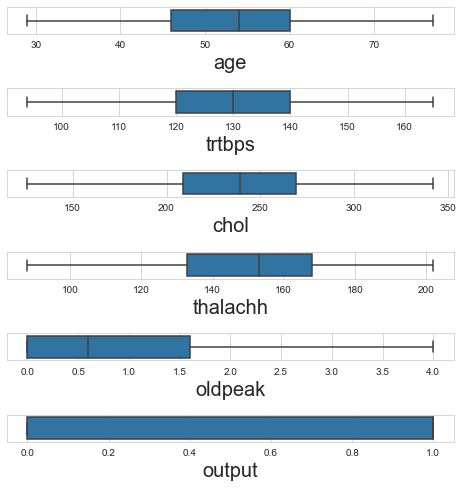

In [14]:
fig, ax = plt.subplots(nrows=len(continous_columns), ncols=1, figsize=(8, 8) )

for i in range(len(continous_columns)):
    x = sns.boxplot(df[continous_columns[i]], ax=ax[i])
    # add x label and edit font size
    x.set_xlabel(continous_columns[i], fontsize=20)

# adjust spaces between subplots
plt.subplots_adjust(hspace=2)

# save plot in png file
plt.savefig('../images/boxplot.png')

plt.show()

output      1.000000
thalachh    0.422517
trtbps     -0.103330
chol       -0.106735
age        -0.228552
oldpeak    -0.429845
Name: output, dtype: float64


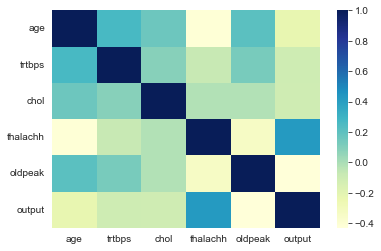

In [15]:
corr_df =df.corr()
print(corr_df['output'].sort_values(ascending=False))
sns.heatmap(corr_df,cmap='YlGnBu')
plt.show()

output      1.000000
thalachh    0.422517
trtbps     -0.103330
chol       -0.106735
age        -0.228552
oldpeak    -0.429845
Name: output, dtype: float64


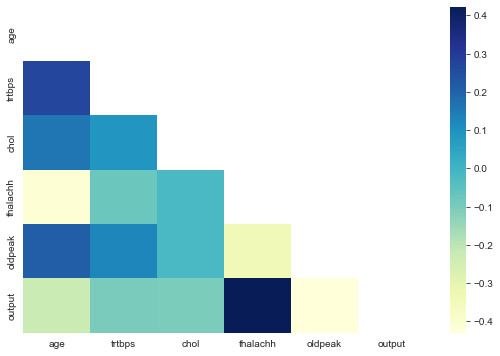

In [16]:
corr_df =df.corr()
print(corr_df['output'].sort_values(ascending=False))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9,6 ))
    ax = sns.heatmap(corr_df,mask=mask,cmap='YlGnBu')

plt.show()

In [17]:
non_cat =['oldpeak','thalachh','chol','age','trtbps','output']

for i in range(14):
    if Columns_Name[i] not in non_cat:
        print('---------------------------------')
        print(Columns_Name[i])
        print('unique : ',len(df[Columns_Name[i]].unique()))
        print(df[Columns_Name[i]].value_counts())
        print('---------------------------------')

---------------------------------
sex
unique :  2
1    194
0     82
Name: sex, dtype: int64
---------------------------------
---------------------------------
cp
unique :  4
0    126
2     81
1     49
3     20
Name: cp, dtype: int64
---------------------------------
---------------------------------
fbs
unique :  2
0    237
1     39
Name: fbs, dtype: int64
---------------------------------
---------------------------------
restecg
unique :  3
1    142
0    132
2      2
Name: restecg, dtype: int64
---------------------------------
---------------------------------
exng
unique :  2
0    190
1     86
Name: exng, dtype: int64
---------------------------------
---------------------------------
slp
unique :  3
2    135
1    126
0     15
Name: slp, dtype: int64
---------------------------------
---------------------------------
caa
unique :  5
0    160
1     62
2     34
3     16
4      4
Name: caa, dtype: int64
---------------------------------
---------------------------------
thall
unique 

In [18]:
# Number Of Unique Value in Each Column
df.apply(lambda x:len(x.unique()))

age          41
sex           2
cp            4
trtbps       41
chol        139
fbs           2
restecg       3
thalachh     88
exng          2
oldpeak      36
slp           3
caa           5
thall         4
output        2
dtype: int64

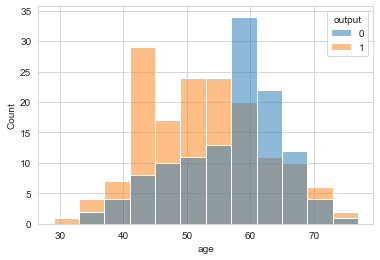

In [19]:
sns.histplot(data = df ,x='age',hue ='output')
plt.show()

we see that most of the heart attck age occourd between 40 and 55 age

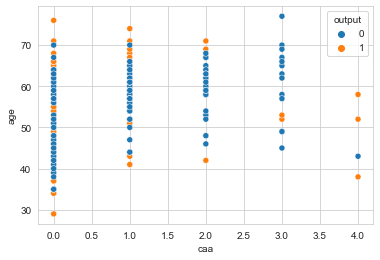

In [20]:
sns.scatterplot(data=df,y = 'age',x='caa',hue='output')
plt.show()

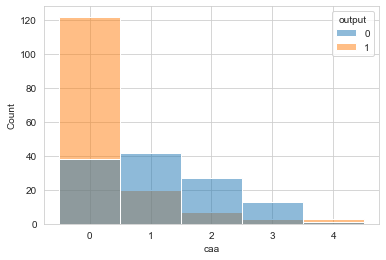

In [21]:
sns.histplot(data= df,x='caa',hue='output')
plt.show()

we see that most of 0 in ca in danger of heart attack

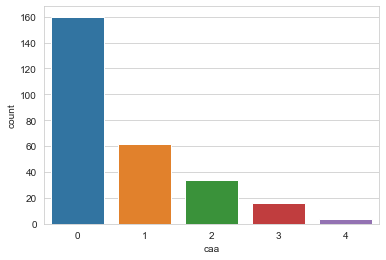

In [22]:
sns.countplot(df['caa'])
plt.show()

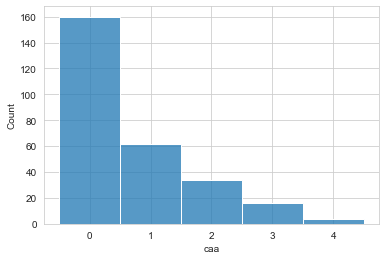

In [23]:
sns.histplot(df['caa'])
plt.show()

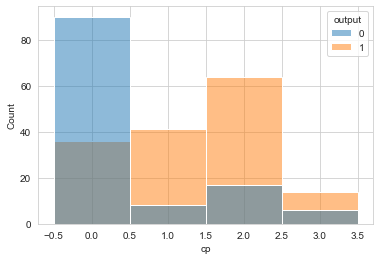

In [24]:
sns.histplot(data=df,x='cp',hue='output')
plt.show()

we see that 2 have most chance to heart attack

# Dymnsion Rediction

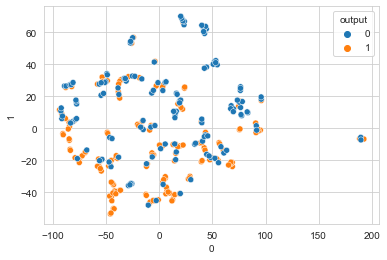

In [25]:
x = df.drop('output',axis=1).copy()
tsne_prop = TSNE(n_components=2,
                 perplexity=3,
                 learning_rate=0.01,
                 init='pca',
                 n_jobs=2,
                 n_iter=10**10,
                 method='barnes_hut',
                 random_state=42
                 ).fit_transform(df.drop('output',axis=1).copy())
new_data = pd.DataFrame(tsne_prop)
sns.scatterplot(new_data[0],new_data[1],hue=df['output'])
plt.show()

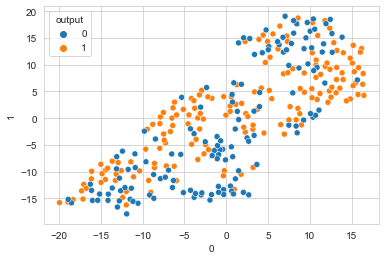

In [27]:
tsne_prop = TSNE(n_components=2,
                 random_state=42
                 ).fit_transform(df.drop('output',axis=1).copy())
new_data = pd.DataFrame(tsne_prop)
sns.scatterplot(new_data[0],new_data[1],hue=df['output'])
plt.show()

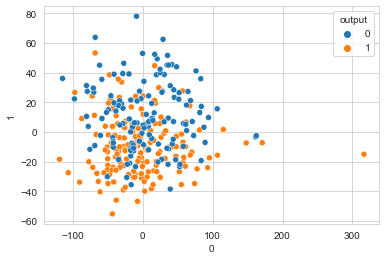

In [26]:
pca = PCA(n_components=2).fit_transform(df.drop('output',axis=1).copy())
pca_data = pd.DataFrame(pca)
sns.scatterplot(pca_data[0],pca_data[1],hue=df['output'])
plt.show()

# Create New Columns

In [160]:
## convert CHOL TO Category
# df['cat_chol'] = pd.cut(df.chol,bins=[0,200,240,1000],labels=['optimal','elevated','high'])
# chol_dict = {'optimal':0,'elevated':1,'high':2}
# df['cat_chol'] = df['cat_chol'].map(chol_dict)
# df['cat_chol'] = df['cat_chol'].astype('int16')

In [28]:
## convert AGE TO Category
# df['cat_age'] = pd.cut(df.age,bins=[0,20,30,40,50,60,70,80,100],labels=[0,1,2,3,4,5,6,7])
# df['cat_age'] = df['cat_age'].astype('int16')
# df['cat_age']

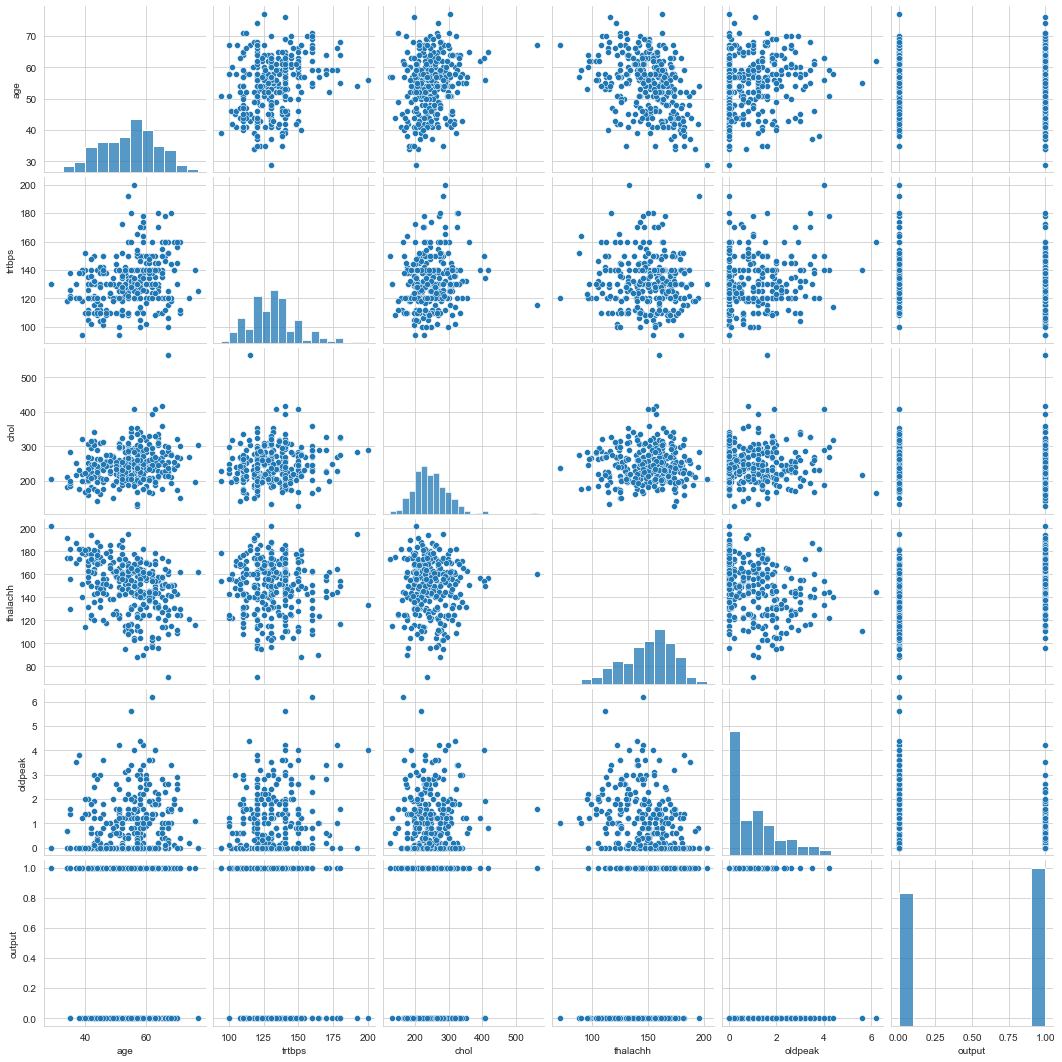

In [70]:
sns.pairplot(df)
plt.show()

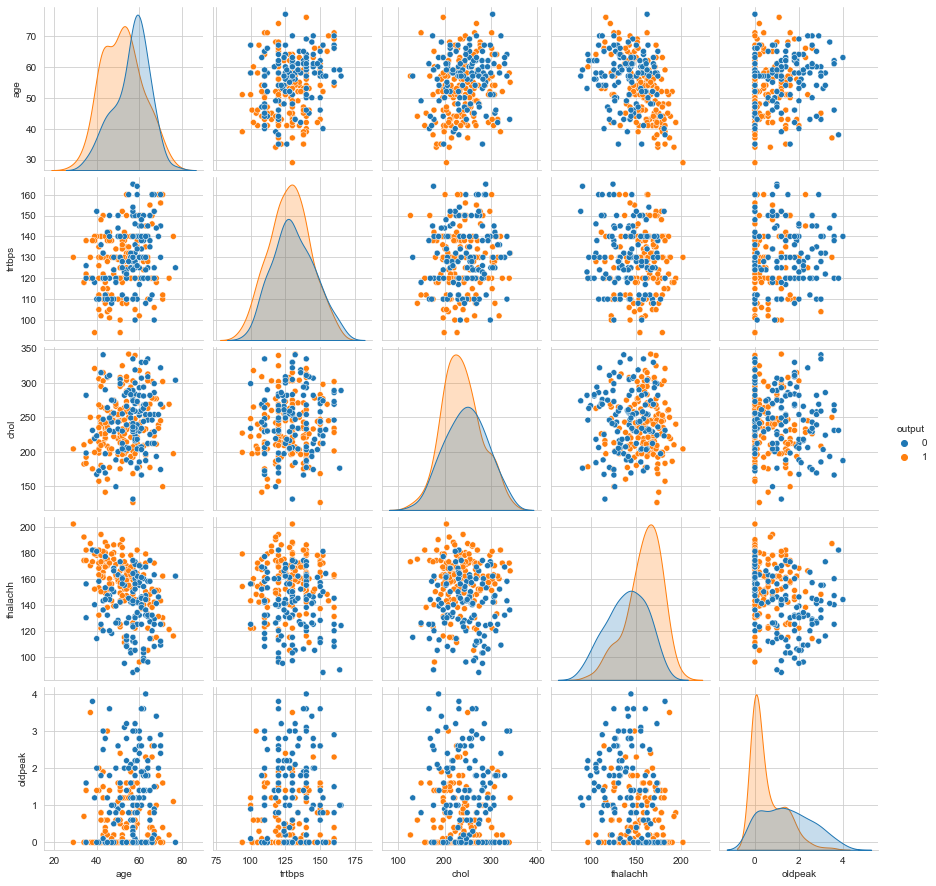

In [74]:
sns.pairplot(df,hue='output')
plt.show()

# Split & Save Train Test

In [25]:
x = df.drop('output',axis=1).copy()
y = df['output'].copy()
x_train ,x_test , y_train ,y_test = train_test_split(x , y ,test_size=.3,random_state=42)

# Save Data as Pickle To use on ML Model

In [26]:
df.to_pickle('../data/prep_data.pkl')
x_train.to_pickle('../data/x_train.pkl')
x_test.to_pickle('../data/x_test.pkl')
y_train.to_pickle('../data/y_train.pkl')
y_test.to_pickle('../data/y_test.pkl')